# Pymaceuticals Inc.
---

### Background

Pymaceuticals Inc. is screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

In its latest study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

### Data Description

 - 9 treament drugs and 1 placebo were test in 249 mice over 45 days.
 - One mouse was removed from the data due to duplicate measurements.
 - In the final data set of 248 mice, the ratio of male to female mice was nearly even at 50.4% vs 49.6%, respectively.
 - The final number of observations in the study totaled 1,880 and the observations per drug ranged from 148 to 230, indicating robust sample sizes for each drug tested.
 - The starting measurement for each tumor was ~45 mm3 across all tested treatments.
 
### Summary Findings 
 - Across the 45-day testing period, Capomulin and Ramicane had the smallest mean tumor volume and the smallest standard deviation, indicating that these 2 drugs were most effective in reducing tumor sizes of the drugs tested.
 

 ![stat%20summary.jpg] 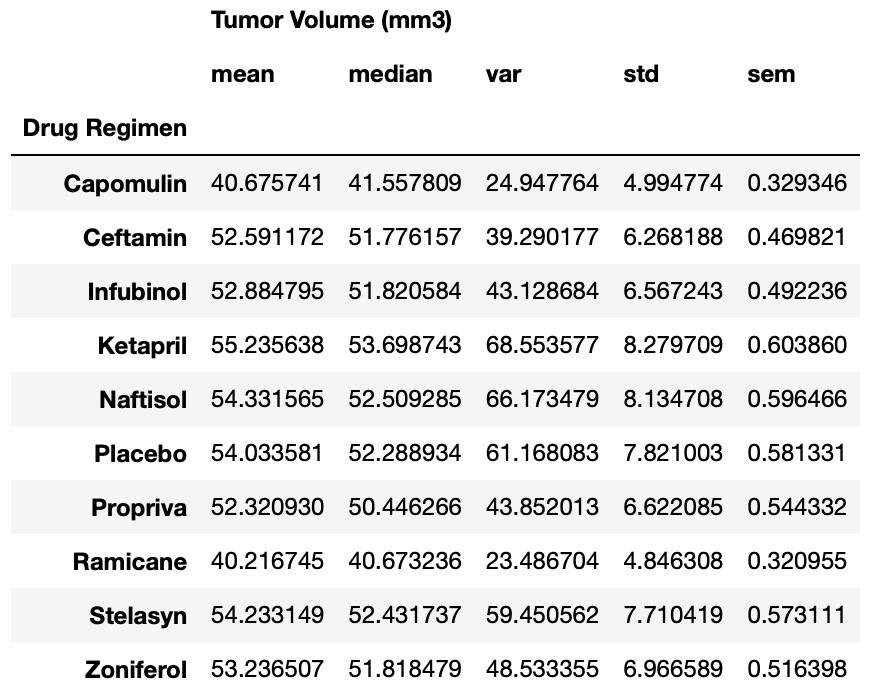


 - Final tumor volume for 4 drugs, Capomulin, Ramicane, Infubinol, and Ceftamin were further analyzed to determine the data distribution for each drug as well as the presence of outliers.
     - The median values and inter-quartile-ranges of the final tumor volumes of Capomulin and Ramicane were the lowest, again suggesting that these two drugs were the most effective.
     - Only Infubinol was shown to have potential outliers.
         
     
 - The Capomulin treatment data suggest a strong positive relationship exists between tumor size and mouse weight based on a Pearson correlation (r = 0.84).
 
 - A linear regression model was run on the Capomulin treatment data with mouse weight as the independent variable and tumor size the dependent variable.  The resulting R-squared of .70 indicates that mouse weight explains 70% of the variation in the observed tumor sizes.
 
 - Based on the Pearson correalation and linear regression R-squared, it is recommended that mouse weight be controlled for during future testing.
 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [44]:
# Display the mouse_metadata data for preview
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [45]:
# Display the study_results data for preview
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [46]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [47]:
# Check the values of all the columns and see if there are any rows with missing data
combined_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [48]:
# Checking the number of mice.
mouse_ID_total = combined_data["Mouse ID"].unique().size
mouse_ID_total

249

In [49]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

df2 = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [50]:
# Optional: Get all the data for the duplicate mouse ID. 
    
g989 = combined_data.loc[combined_data["Mouse ID"] == "g989"]
g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_combined_data = combined_data[combined_data["Mouse ID"] != "g989"]

clean_combined_data.to_csv('clean_combined_data.csv')

clean_combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [52]:
# Checking the number of mice in the clean DataFrame.

mouse_ID_total = clean_combined_data["Mouse ID"].unique().size
mouse_ID_total

248

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Create series to store the summary statistics of the "Tumor Volume" "Drug Regimen"

mean_volume = clean_combined_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_volume = clean_combined_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_volume = clean_combined_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_volume = clean_combined_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_volume = clean_combined_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


In [54]:
# Assemble the resulting series into a single summary DataFrame.

tumor_vol_sumstat = pd.DataFrame({'Mean Tumor Volume':mean_volume, 
                                'Median Tumor Volume':median_volume,    
                                'Variance Tumor Volume' : var_volume,
                                'Std Tumor Volume' : std_volume,
                                'SEM Tumor Volume' : sem_volume
                             })
tumor_vol_sumstat

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_stat_agg = clean_combined_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 
                                                'median', 'var', 'std', 'sem'])
summary_stat_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

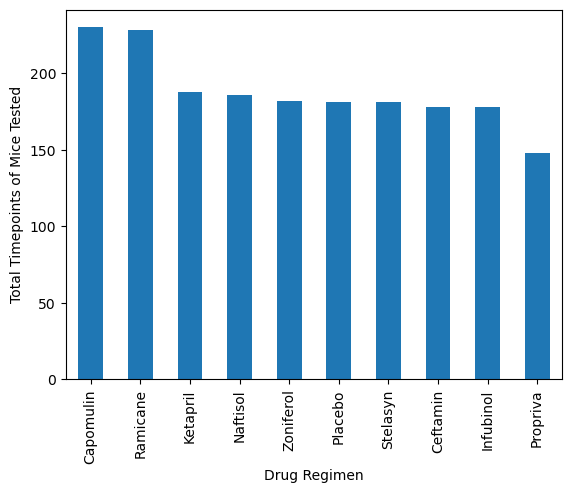

In [56]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen 
# using Pandas.

tot_timepoints_by_drug = clean_combined_data.groupby(["Drug Regimen"]).count()["Timepoint"].sort_values(ascending=False)

tot_timepoints_by_drug.plot(kind="bar", ylabel="Total Timepoints of Mice Tested")
plt.show()

In [57]:
tot_timepoints_by_drug_df = pd.DataFrame(tot_timepoints_by_drug)
tot_timepoints_by_drug_df

,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


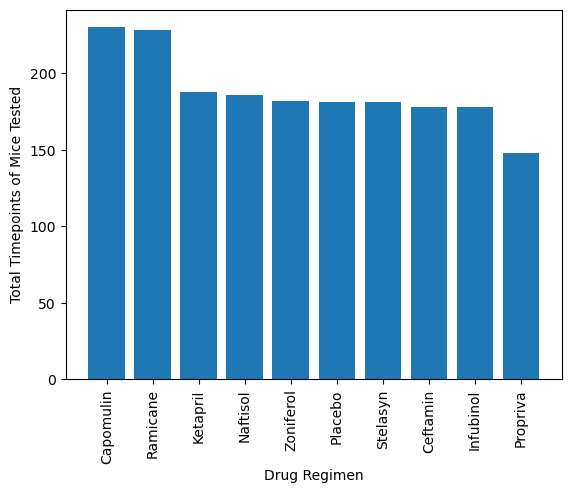

In [58]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen 
# using pyplot.

drug_regimen = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn",
               "Ceftamin", "Infubinol", "Propriva"]

y_axis = tot_timepoints_by_drug_df["Timepoint"]

plt.bar(drug_regimen, y_axis)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints of Mice Tested")
plt.show()


In [59]:
# Group data by Sex and count the IDs for Unique Mice

male_female = clean_combined_data.groupby(["Sex"])["Mouse ID"].nunique()
male_female

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

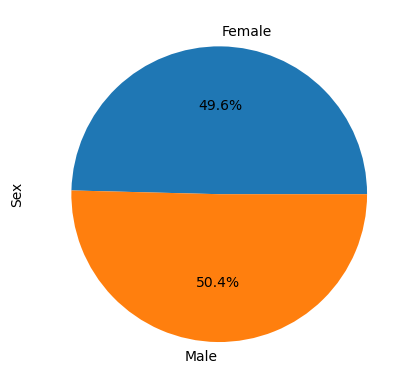

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

male_female.plot(kind="pie", autopct="%1.1f%%", ylabel="Sex")
plt.show()

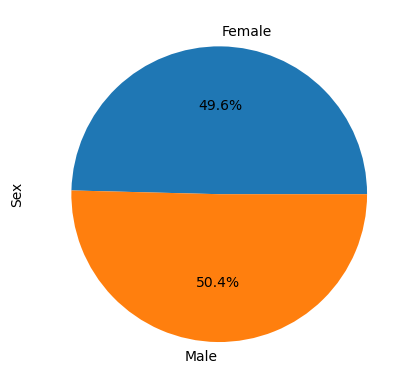

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
    
values = [123, 125]
labels = ["Female", "Male"]

plt.pie(values, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [62]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = pd.DataFrame(clean_combined_data.groupby(["Mouse ID"])["Timepoint"].max())
last_timepoint.reset_index()
last_timepoint

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [63]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_tp_combined_data = pd.merge(last_timepoint, clean_combined_data, on =["Mouse ID", "Timepoint"])
last_tp_combined_data.reset_index()


,index,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,0,a203,45,Infubinol,Female,20,23,67.973419,2
1,1,a251,45,Infubinol,Female,21,25,65.525743,1
2,2,a262,45,Placebo,Female,17,29,70.717621,4
3,3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...,...
243,243,z435,10,Propriva,Female,12,26,48.710661,0
244,244,z578,45,Ramicane,Male,11,16,30.638696,0
245,245,z581,45,Infubinol,Female,24,25,62.754451,3
246,246,z795,45,Naftisol,Female,13,29,65.741070,3


In [64]:
# Check the data for one example mouse to ensure only the last timepoint is in the dataframe

z969 = last_tp_combined_data.loc[last_tp_combined_data["Mouse ID"] == "z969"]
z969.head(40)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
247,z969,45,Naftisol,Male,9,30,73.867845,4


In [65]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tot_tum_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tum_vol = last_tp_combined_data.loc[last_tp_combined_data["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    
    # add subset for plotting
    tot_tum_vol.append(tum_vol)
    
    # Determine outliers using upper and lower bounds
    quantiles = tum_vol.quantile([.25, .5, .75])
    lowerq = quantiles[.25]
    upperq = quantiles[.75]
    IQR = upperq - lowerq
    lowerbound = lowerq - (1.5 * IQR)
    upperbound = upperq + (1.5 * IQR)

    print(f"{drug}'s potential outliers: {tum_vol.loc[(tum_vol < lowerbound) | (tum_vol > upperbound)]}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


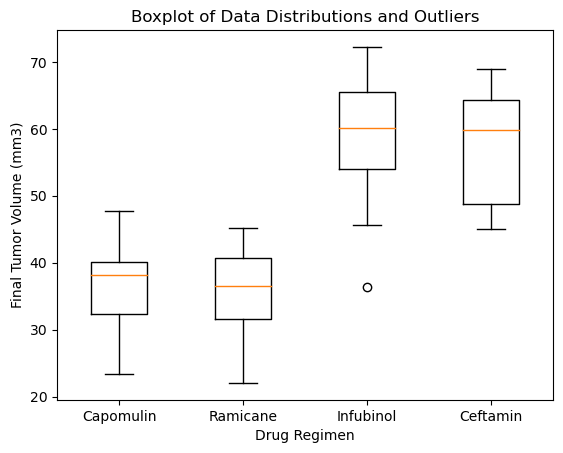

In [66]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tot_tum_vol, labels = drugs)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.title("Boxplot of Data Distributions and Outliers")
plt.show()

## Line and Scatter Plots

In [67]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# View the Capomulin complete data set to select a mouse
cap_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
cap_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [68]:
# Show data for mouse s185

s185 = cap_data.loc[cap_data["Mouse ID"] == "s185"]
s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


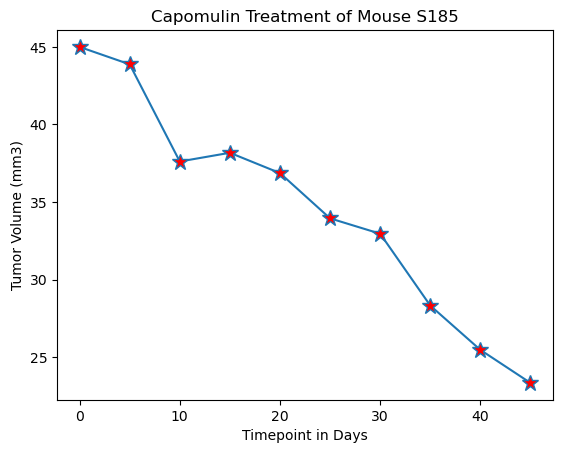

In [69]:
# Generate a line plot of tumor volume vs. time point for mouse "s185" treated with Capomulin

plt.plot(s185["Timepoint"], s185["Tumor Volume (mm3)"], marker = '*', markerfacecolor='red', markersize=12) 
plt.title("Capomulin Treatment of Mouse S185")
plt.xlabel("Timepoint in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

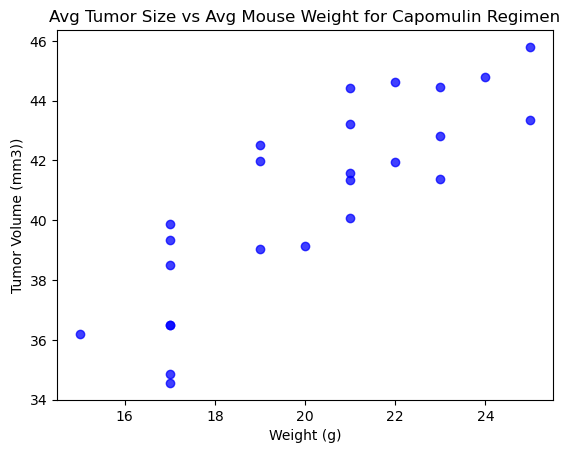

In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

x_values = cap_data.groupby(['Mouse ID']).mean()["Weight (g)"]
y_values = cap_data.groupby(['Mouse ID']).mean()["Tumor Volume (mm3)"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", alpha=0.75)

plt.title("Avg Tumor Size vs Avg Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3))")
plt.show()

## Correlation and Regression

In [71]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(cap_data.groupby(['Mouse ID']).mean()["Weight (g)"],
                       cap_data.groupby(['Mouse ID']).mean()["Tumor Volume (mm3)"])[0],2)

print(f"The Pearson correlation between mouse weight and average tumor volume is {corr}")

The Pearson correlation between mouse weight and average tumor volume is 0.84


The R-squared of average mouse weight and  average tumor volume is 0.7088568047708723


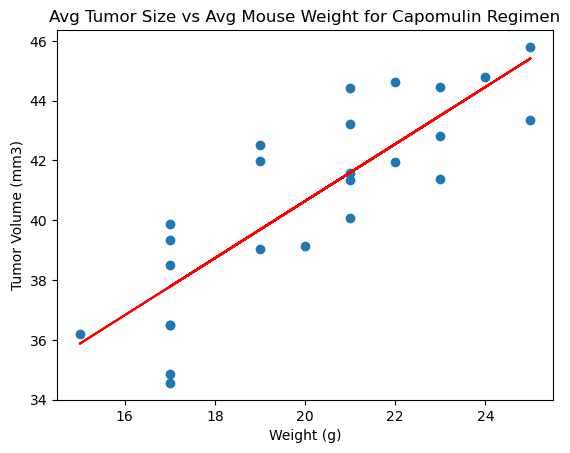

In [72]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = cap_data.groupby(['Mouse ID']).mean()["Weight (g)"]
y_values = cap_data.groupby(['Mouse ID']).mean()["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.title("Avg Tumor Size vs Avg Mouse Weight for Capomulin Regimen")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

print(f"The R-squared of average mouse weight and  average tumor volume is {rvalue**2}")

plt.show()